In [2]:
import os
import warnings

import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import BSpline
from scipy.stats import gaussian_kde

import jax.numpy as jnp
from jax import random, vmap

import numpyro
import numpyro.distributions as dist
import numpyro.optim as optim
from numpyro.diagnostics import hpdi, print_summary
from numpyro.infer import Predictive, SVI, Trace_ELBO, init_to_value
from numpyro.infer.autoguide import AutoLaplaceApproximation

if "SVG" in os.environ:
    %config InlineBackend.figure_formats = ["svg"]
warnings.formatwarning = lambda message, category, *args, **kwargs: "{}: {}\n".format(
    category.__name__, message
)
az.style.use("arviz-darkgrid")
numpyro.set_platform("cpu")

c:\Users\mcemc\OneDrive\Documents\rethinking_stats_numpyro\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
howell = pd.read_csv("../data/Howell1.csv", sep=";")
howell = howell[howell["age"] < 13]

# Write 

In [ ]:
# Height is some function of age, or H = f(A) + U
# H = bA + U

# A ~ Uniform(0,13)
# U ~ Normal(mu, sigma)

Priors

Pr(mu,sigma)

Pr(mu,sigma | A, H, W) The posterior conditional probability that we aim to calculate

Pr(A, H, W | mu, sigma) This is the likelihood of data given observed parameters

H ~ Normal(mu,sigma)

mu ~ Normal(mu, sigma) This is a prior

sigma ~ Uniform(min,max) This is a prior. Out intuition tells us that sigma can only be positive, so we can constrain it to (0,max).



Generative simulation

Height is distributed normally with a mean that is a linear function of age.

In [ ]:
U = dist.Normal(mu, sigma).sample(random.PRNGKey(0), (len(howell), 1))
A = dist.Uniform(0, 0.1).sample(random.PRNGKey(0), (len(howell), 1))
H = 
W = 

H = b*A + U

Instantiate priors

In [18]:

def flist(height):
    mu = numpyro.sample("mu", dist.Normal(50, 50))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    numpyro.sample("height", dist.Normal(mu, sigma), obs=height)

Fit the model to the data

In [19]:
m4_1 = AutoLaplaceApproximation(flist)
svi = SVI(flist, m4_1, optim.Adam(1), Trace_ELBO(), height=howell.height.values)
svi_result = svi.run(random.PRNGKey(0), 2000)
p4_1 = svi_result.params

100%|██████████| 2000/2000 [00:00<00:00, 3786.82it/s, init loss: 1165.2047, avg. loss [1901-2000]: 661.2421]


In [20]:
samples = m4_1.sample_posterior(random.PRNGKey(1), p4_1, sample_shape=(1000,))
print_summary(samples, 0.89, False)


                mean       std    median      5.5%     94.5%     n_eff     r_hat
        mu     98.76      1.77     98.79     96.00    101.55    792.24      1.00
     sigma     21.38      1.25     21.38     19.40     23.30   1007.22      1.00



Display variance-covariance matrix that describes the multi-dimensional Gaussian distribution of Mu and Sigma.
This matrix tells us how each parameter relates to each other in the posterior distribution.

In [21]:
samples = m4_1.sample_posterior(random.PRNGKey(1), p4_1, sample_shape=(1000,))
vcov = jnp.cov(jnp.stack(list(samples.values()), axis=0))
vcov

Array([[ 3.1172564, -0.0135641],
       [-0.0135641,  1.5594983]], dtype=float32)

In [22]:
print(jnp.diagonal(vcov))
print(vcov / jnp.sqrt(jnp.outer(jnp.diagonal(vcov), jnp.diagonal(vcov))))

[3.1172564 1.5594983]
[[ 1.         -0.00615194]
 [-0.00615194  1.        ]]


## Actual homework problem

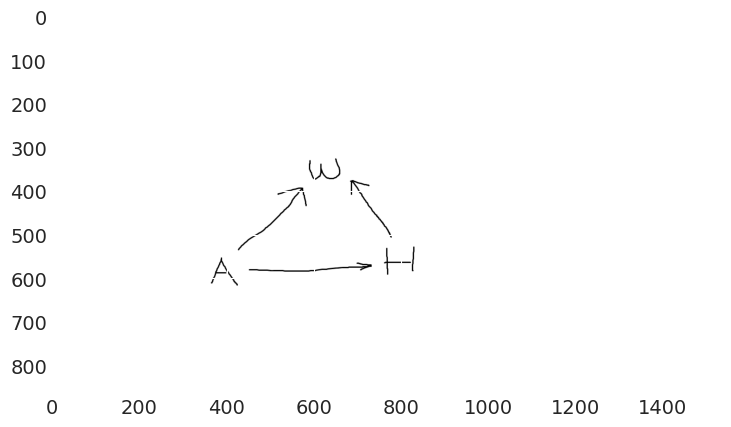

In [11]:
from PIL import Image
img = jnp.asarray(Image.open('DAG_age_height_weight.png'))
imgplot = plt.imshow(img)

Okay, so because we have multiple variables, and one variable with direct and indirect effects on the outcome variable, so we want to use a spline to create the model.

In [ ]:
xbar = howell.height.mean()

def model(age, weight=None):    
    a = numpyro.sample("a", dist.Normal(178, 20))
    b = numpyro.sample("log_b", dist.LogNormal(0, 1))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    mu = numpyro.deterministic("mu", a + b * (age - xbar))
    numpyro.sample("weight", dist.Normal(mu, sigma), obs=weight)


Predictive(model, num_samples=100)(rng_key=random.PRNGKey(0),)
m4_3b = AutoLaplaceApproximation(model)
svi = SVI(
    model,
    m4_3b,
    optim.Adam(1),
    Trace_ELBO(),
    weight=howell.weight.values,
    height=howell.height.values,
)
svi_result = svi.run(random.PRNGKey(0), 2000)
p4_3b = svi_result.params

In [ ]:
def model(age, weight=None):

    
    a = numpyro.sample("a", dist.Normal(178, 20))
    b = numpyro.sample("log_b", dist.LogNormal(0, 1))
    sigma = numpyro.sample("sigma", dist.Uniform(0, 50))
    mu = numpyro.deterministic("mu", a + b * (age - xbar))


    numpyro.sample("weight", dist.Normal(mu, sigma), obs=weight)